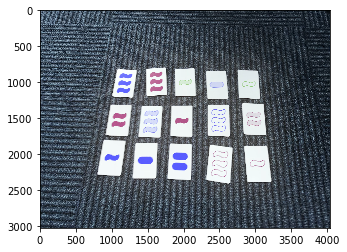

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import math
%matplotlib inline

img = cv2.imread('IMG_1797.JPG')

plt.imshow(img)

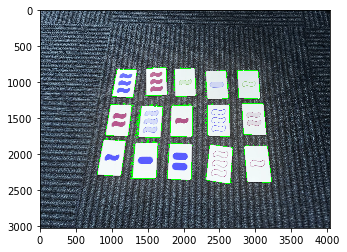

In [7]:
img = cv2.imread(imagepath)
frame = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(1,1),1000)
flag, thresh = cv2.threshold(blur, 120, 255, cv2.THRESH_BINARY)
# Find contours
image,contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea,reverse=True) 
# Select long perimeters only
perimeters = [cv2.arcLength(contours[i],True) for i in range(len(contours))]
listindex=[i for i in range(15) if perimeters[i]>perimeters[0]/2]
numcards=len(listindex)
# Show image
imgcont = img.copy()
[cv2.drawContours(imgcont, [contours[i]], 0, (0,255,0), 5) for i in listindex]
plt.imshow(imgcont)

[[ 3141.  1866.]
 [ 2837.  1900.]
 [ 2893.  2386.]
 [ 3217.  2378.]]
[[ 2371.  1870.]
 [ 2298.  2358.]
 [ 2651.  2401.]
 [ 2688.  1926.]]
[[ 1667.  1853.]
 [ 1296.  1869.]
 [ 1255.  2345.]
 [ 1613.  2323.]]
[[ 1817.  1843.]
 [ 1770.  2336.]
 [ 2086.  2357.]
 [ 2121.  1856.]]
[[  928.  1779.]
 [  795.  2276.]
 [ 1101.  2303.]
 [ 1192.  1818.]]
[[ 1709.  1332.]
 [ 1402.  1336.]
 [ 1337.  1775.]
 [ 1676.  1759.]]
[[ 1298.  1325.]
 [  981.  1312.]
 [  903.  1731.]
 [ 1227.  1737.]]
[[ 2813.  1296.]
 [ 2835.  1720.]
 [ 3141.  1731.]
 [ 3107.  1303.]]
[[ 2307.  1331.]
 [ 2331.  1734.]
 [ 2636.  1751.]
 [ 2634.  1311.]]
[[ 2091.  1303.]
 [ 1827.  1334.]
 [ 1815.  1748.]
 [ 2119.  1745.]]
[[ 2743.   837.]
 [ 2760.  1211.]
 [ 3055.  1228.]
 [ 3032.   847.]]
[[ 2312.   850.]
 [ 2298.  1204.]
 [ 2619.  1223.]
 [ 2587.   848.]]
[[ 1876.   823.]
 [ 1879.  1190.]
 [ 2164.  1187.]
 [ 2151.   814.]]
[[ 1061.   824.]
 [ 1004.  1193.]
 [ 1290.  1211.]
 [ 1348.   841.]]
[[ 1748.   799.]
 [ 1478.   818.]


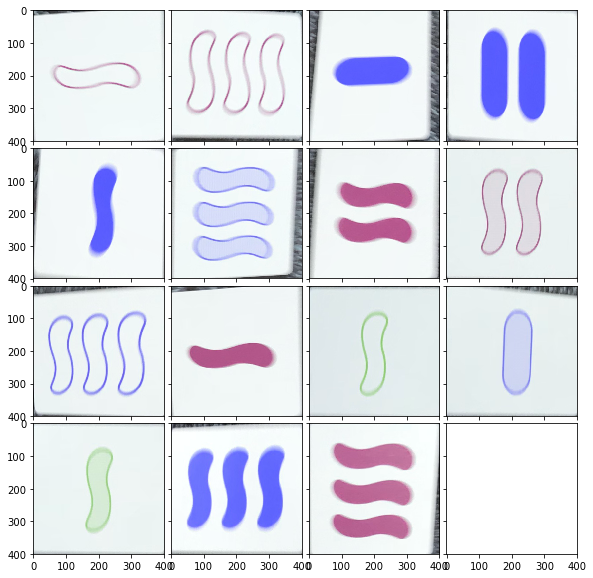

In [34]:
warp = list(range(numcards))
for i in range(numcards):
    card = contours[i]
    peri = cv2.arcLength(card,True)
    approx = cv2.approxPolyDP(card,0.04*peri,True)
    rect = cv2.minAreaRect(contours[i])
    r = cv2.boxPoints(rect)
    
    h = np.float32([[0,0],[399,0],[399,399],[0,399]])
    approx = np.float32([item for sublist in approx for item in sublist])
    print(approx)
    transform = cv2.getPerspectiveTransform(approx,h)
    warp[i] = cv2.warpPerspective(img,transform,(400,400))

# Show perspective correction
fig = plt.figure(1, (10,10))
grid = ImageGrid(fig, 111, # similar to subplot(111)
                nrows_ncols = (4, 4), # creates 2x2 grid of axes
                axes_pad=0.1, # pad between axes in inch.
                aspect=True, # do not force aspect='equal'
                )

for i in range(numcards):
    grid[i].imshow(warp[i]) # The AxesGrid object work as a list of axes.
    cv2.imwrite(f"test{i}.jpg", warp[i])

In [29]:

pts1 = np.float32([[155, 120], [480, 120], [20, 475], [620, 475]])

In [30]:
print(pts1.shape)

(4, 2)


In [ ]:
                            ```````